In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
po = gpd.read_file('../data/police_outline.geojson')
print(po.crs)
po.head( )

EPSG:4326


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."


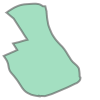

In [3]:
po.loc[0, 'geometry']

<Axes: >

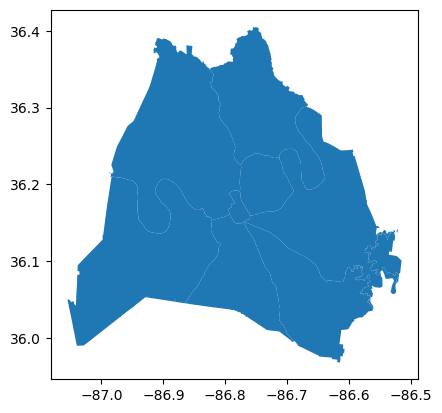

In [4]:
po.plot()

<Axes: >

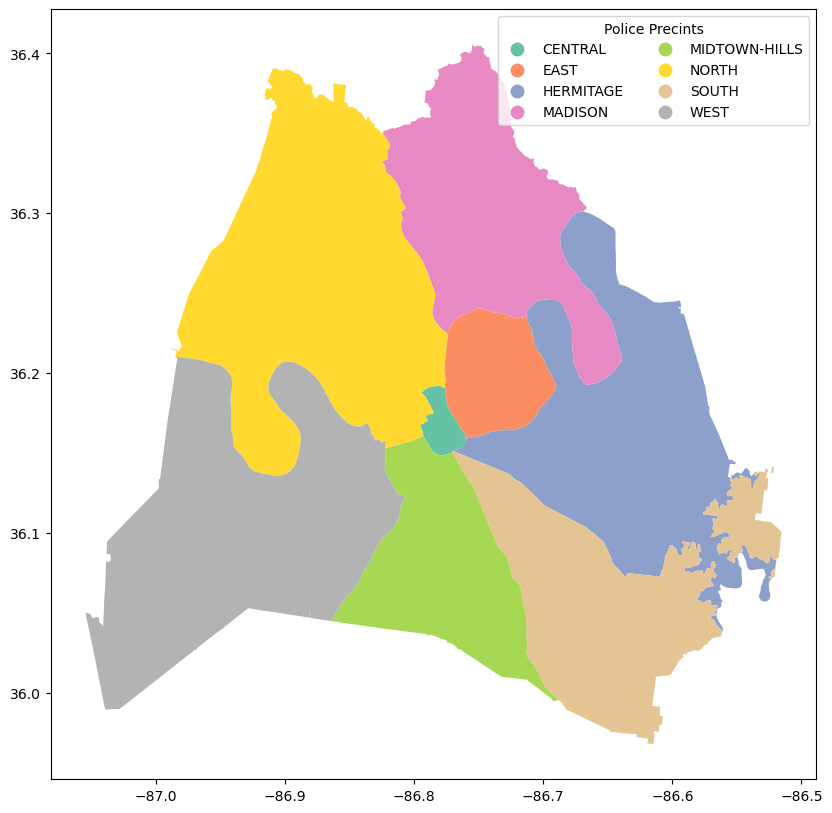

In [8]:
leg_set = {
    'title': 'Police Precints',
    'loc': 'upper right',
    'ncol': 2
}
po.plot(column='precinct',
         figsize=(10,10),
         legend=True,
         legend_kwds=leg_set,
         cmap='Set2')

In [9]:
br = gpd.read_file('../data/br.geojson')
print(br.crs)
br.head()

EPSG:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [10]:
po = po[['precinct', 'geometry']]

In [11]:
racks_by_po = gpd.sjoin( br, po, predicate='within')

In [12]:
racks_by_po.head()

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,precinct
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993),6,SOUTH
103,TN State Government Building,0,State Building,Public,311,104,Proposed,-86.6898611113,Rack,Health Dept,36.1118638887,0,POINT (-86.68986 36.11186),6,SOUTH
113,"Ezell Road Park, Mill Creek Greenway",1,Park/Greenway,Public,159,114,Existing,-86.685845585,Rack,Health Dept,36.0906216903,2,POINT (-86.68585 36.09062),6,SOUTH
114,Ezell Road Park (Soccer Field Parking Lot),0,Park,Public,314,115,Proposed,-86.6782356331,Rack,Health Dept,36.0879054472,0,POINT (-86.67824 36.08791),6,SOUTH
115,Haywood Elementary School,1,Elementary School,Public,160,116,Existing,-86.7086999995,Rack,Health Dept,36.0748694444,20,POINT (-86.70870 36.07487),6,SOUTH


In [13]:
racks_by_po['precinct'].value_counts()

precinct
CENTRAL          114
EAST              66
NORTH             62
WEST              42
SOUTH             41
MIDTOWN-HILLS     40
HERMITAGE         39
MADISON           22
Name: count, dtype: int64

In [14]:
racks_in_central = racks_by_po[racks_by_po['precinct']=='CENTRAL']
racks_in_central.shape

(114, 15)

In [15]:
polygon_central=po[po['precinct']=='CENTRAL']
polygon_central.shape

(1, 2)

<Axes: >

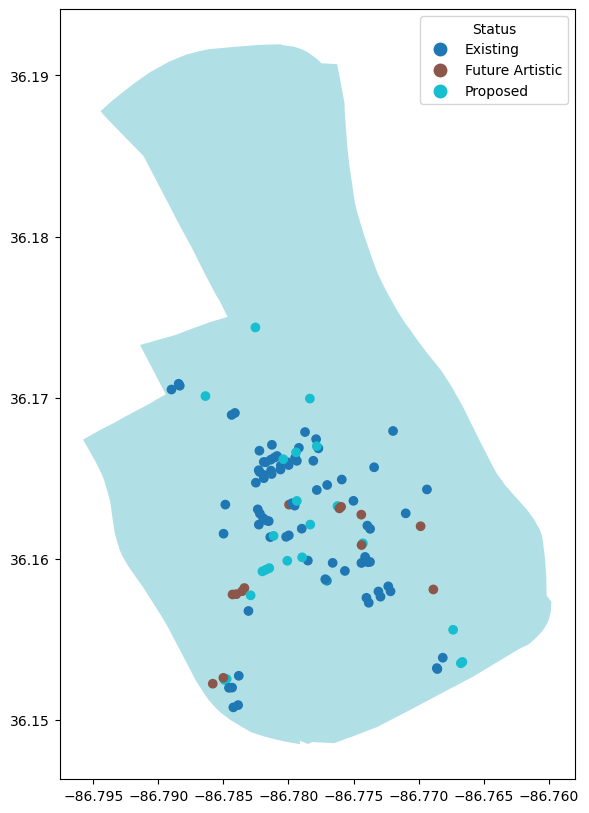

In [17]:
leg_kw = {'title': 'Status', 'loc': 'upper right',}
ax = polygon_central.plot(figsize = (10,10), color='powderblue')
racks_in_central.plot(ax=ax, column='status',
            legend=True, legend_kwds=leg_kw)

In [18]:
polygon_central.geometry.centroid

C:\Users\koste\AppData\Local\Temp\ipykernel_93340\2581236101.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_central.geometry.centroid


0    POINT (-86.77888 36.16793)
dtype: geometry

In [20]:
center=polygon_central.geometry.centroid[0]
print(center)

POINT (-86.77887932264129 36.16793097386704)


C:\Users\koste\AppData\Local\Temp\ipykernel_93340\879223017.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center=polygon_central.geometry.centroid[0]


In [21]:
area_center=[center.y, center.x]

In [22]:
map_center = folium.Map(location=area_center, zoom_start=10)
map_center

In [23]:
i = 0
for row_index, row_values in racks_in_central.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 9
values are:
 
detail_loc     Bus Stop; Church St at 5th Ave N, Fifth Third ...
quantity                                                       0
location                                                Bus Stop
domain                                                    Public
idnumber                                                      83
objectid                                                      10
status                                           Future Artistic
lon                                               -86.7799546267
type                                                        Rack
data_colle                                           Health Dept
lat                                                36.1633719897
capacity                                                       0
geometry            POINT (-86.77995462667019 36.16337198970625)
index_right                                                    0
precinct                                                 CENTRAL


In [29]:
map_central = folium.Map(location=area_center, zoom_start=14)
folium.GeoJson(polygon_central).add_to(map_central)

for i, v in racks_in_central.iterrows():
    loc = [v['lat'], v['lon']]
    pop = f"Bike Rack {v['detail_loc']}"
    icon=folium.Icon(color='pink', icon='bicycle', prefix='fa')

    marker = folium.Marker(
        location=loc,
        popup= pop,
        icon=icon
    )
    marker.add_to(map_central)
map_central.save('../maps/map37207.html')
map_central

In [31]:
cluster_map = folium.Map(location= area_center, zoom_start=14)
marker_cluster = MarkerCluster().add_to(cluster_map)

folium.GeoJson(polygon_central).add_to(cluster_map)

# inside the loop add each marker to the cluster
for row_index, row_values in racks_in_central.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = f"Bike Rack {v['detail_loc']}"
    icon=folium.Icon(color='#D2691E', icon='bicycle', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map.save('../maps/cluster37207.html')

cluster_map

C:\Users\koste\AppData\Local\Temp\ipykernel_93340\1981883974.py:10: UserWarning: color argument of Icon should be one of: {'cadetblue', 'orange', 'darkred', 'darkgreen', 'lightgray', 'white', 'lightgreen', 'black', 'beige', 'darkblue', 'red', 'lightred', 'darkpurple', 'blue', 'pink', 'gray', 'lightblue', 'green', 'purple'}.
  icon=folium.Icon(color='#D2691E', icon='bicycle', prefix='fa')


In [32]:
map_central = folium.Map(location =  area_center, zoom_start = 14)

folium.GeoJson(polygon_central).add_to(map_central)

#create a list of locations and pass them to FastMarkerCluster()
locations = racks_in_central[['lat', 'lon']].values.tolist()
map_central.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_central